In [1]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import axes3d
import json
from alive_progress import alive_bar
import os
import piexif
import logging
import pprint
# %matplotlib widget

In [2]:
def pull_usercomment_dict(filepath):
    """
    Reads UserComment Exif data from a file, and returns the contained bytes as a dictionary.
    Args:
        filepath: Path to the Exif-containing file
    """
    try:
        exif_dict = piexif.load(filepath)
    except piexif._exceptions.InvalidImageDataError:
        logging.warning("Invalid data at {}. Skipping.".format(filepath))
        return None
    if "Exif" in exif_dict and piexif.ExifIFD.UserComment in exif_dict["Exif"]:
        try:
            return json.loads(exif_dict["Exif"][piexif.ExifIFD.UserComment].decode())
        except json.decoder.JSONDecodeError:
            logging.error(
                f"Capture {filepath} has old, corrupt, or missing OpenFlexure metadata. Unable to reload to server."
            )
    else:
        return None

In [58]:
filepath = r'E:\tiling\40x_ricestem'

f = open(os.path.join(filepath, 'tiling_cache.json'))

txt = json.load(f)

# pprint.pprint(txt)

ignore_phrases = ['stitched', 'comparison', 'Fused', 'stage']

img_list = [f for f in os.listdir(filepath) if os.path.isfile(os.path.join(filepath,f)) and f.lower().endswith(('.png', '.jpg', '.jpeg', '.tiff', '.bmp', '.gif')) and not any(phrase in f for phrase in ignore_phrases)]

csm = os.path.join(filepath, img_list[0])

csm = pull_usercomment_dict(csm)['instrument']['settings']['extensions']['org.openflexure.camera_stage_mapping']['image_to_stage_displacement']
print(csm)

print(len(txt['tiling_inputs']['images']))

positions = []

for i in txt['tiling_inputs']['images']:
    pos = np.dot(i['position_from_stage'], csm)
    positions.append(pos)

[[0.062304744502610754, 4.492729300656015], [4.543377912998429, -0.02624840341589032]]
85


In [59]:
width = set(list(([round(x[0]) for x in positions])))
height = set(list([round(x[1]) for x in positions]))

print(width)

print(len(width), len(height))
print(len(width)*len(height))

for i in positions:
    plt.scatter(i[0], i[1])

plt.show()

{8256, -31167, -7514, 31910, 16140, -23283, 371, 24025, -15398}
9 18
162


In [31]:
folder_path = r"E:\tiling\pap_smear_57"

img_list = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path,f)) and f.lower().endswith(('.png', '.jpg', '.jpeg', '.tiff', '.bmp', '.gif')) and "stitched" not in f and "stage" not in f]

# sample_list = [f for f in img_list if 'sample' in pull_usercomment_dict(os.path.join(folder_path,f))['image']['tags']]

# img_list = sample_list.copy()

In [32]:
import datetime

img_time = []
for img in img_list:
    img_time.append(datetime.datetime.strptime(pull_usercomment_dict(os.path.join(folder_path, img))['image']['time'], '%Y-%m-%dT%H:%M:%S.%f'))

duration = [(a - img_time[0]).total_seconds() for a in img_time]

print(max(duration)/60)

135.70755611666667


In [33]:
coords = []
for img in img_list:
    x = pull_usercomment_dict(os.path.join(folder_path, img))['instrument']['state']['stage']['position']['x']
    y = pull_usercomment_dict(os.path.join(folder_path, img))['instrument']['state']['stage']['position']['y']
    z = pull_usercomment_dict(os.path.join(folder_path, img))['instrument']['state']['stage']['position']['z']
    coords.append([x ,y, z])

In [34]:
plt.figure()
plt.plot(np.array(coords)[:,0], np.array(coords)[:,1],'.')
plt.show()

print(coords)

[[-11516, -12915, 8], [-11516, -17220, -21], [-11516, -21525, -93], [-11516, -25830, -127], [-11516, -30135, -354], [-11516, -34440, -487], [-11516, -38745, -791], [-11516, -4305, -78], [-11516, -43050, -1160], [-11516, -47355, -1534], [-11516, -51660, -1844], [-11516, -55965, -2419], [-11516, -60270, -3011], [-11516, -64575, -3422], [-11516, -68880, -4468], [-11516, -73185, -5154], [-11516, -77490, -5154], [-11516, -8610, 10], [-11516, 0, -193], [-11516, 12915, -813], [-11516, 17220, -1133], [-11516, 21525, -1524], [-11516, 25830, -2010], [-11516, 30135, -2492], [-11516, 34440, -3013], [-11516, 38745, -3658], [-11516, 4305, -352], [-11516, 43050, -4341], [-11516, 47355, -4933], [-11516, 51660, -5772], [-11516, 55965, -5772], [-11516, 8610, -517], [-17274, -12915, -199], [-17274, -17220, -236], [-17274, -21525, -327], [-17274, -25830, -476], [-17274, -30135, -628], [-17274, -34440, -849], [-17274, -38745, -1112], [-17274, -4305, -312], [-17274, -43050, -1497], [-17274, -47355, -1922], 

In [35]:
to_plot = coords.copy()

In [46]:
to_plot_x = np.array([loc[0] for loc in to_plot])*78/10**6
to_plot_y = np.array([loc[1] for loc in to_plot])*78/10**6
to_plot_z = np.array([loc[2] for loc in to_plot])*50/10**3

to_plot_all = np.array(to_plot)


In [60]:
cols = 2
rows = 4


fig = plt.figure(figsize=(8, 10))
import matplotlib.gridspec as gridspec
G = gridspec.GridSpec(rows, cols)

ax = fig.add_subplot(G[0:rows-1,:], projection='3d')
# ax = fig.add_subplot(projection='3d')

ax2 = fig.add_subplot(G[rows-1,0])
ax2.plot(to_plot_x, to_plot_z,'.')

ax3 = fig.add_subplot(G[rows-1,1])
ax3.plot(to_plot_y, to_plot_z,'.')
ax2.set_xlabel('Stage position x (mm)', fontsize = 16)
ax2.set_ylabel('Stage position\nz (µm)', fontsize = 16)
ax3.set_xlabel('Stage position y (mm)', fontsize = 16)

ax.plot_trisurf(to_plot_x, to_plot_y, to_plot_z, alpha = 0.6)
ax.scatter(to_plot_x, to_plot_y, to_plot_z, color = 'black')

ax.set_xlabel('\n\nStage position x (mm)', fontsize = 16)
ax.set_ylabel('\n\nStage position y (mm)', fontsize = 16)

ax.set_zlabel('\nFocused stage height (µm)', fontsize = 16)

ax.tick_params(axis='both', which='major', labelsize=13)
# ax.dist = 11

# plt.tight_layout()
plt.savefig('heightmap_full.png', bbox_inches = 'tight')
plt.show()

# import plotly.graph_objects as go

# fig = go.Figure(data=[go.Scatter3d(x=to_plot_x/3, y=to_plot_y/3, z=to_plot_z,
#                                    mode='markers')])
# fig.update_scenes(aspectmode='data')

# fig.show()

In [10]:
x_coords = to_plot_all[:50]

y_coords = to_plot_all[50:]

In [11]:
x = x_coords[:, 0]
x_new = np.linspace(min(x), max(x),500)
z = np.polyfit(x, x_coords[:, 2], 2)
print(z)
f = np.poly1d(z)
y_new = f(x_new)

plt.plot(x_new, y_new, '.')
plt.plot(x, x_coords[:, 2], '.', color = 'red')
plt.show()
print(int(x_new[np.argmax(y_new)]))

x = y_coords[:, 1]
x_new = np.linspace(min(x), max(x),500)
z = np.polyfit(x, y_coords[:, 2], 2)
print(z)
f = np.poly1d(z)
y_new = f(x_new)

plt.plot(x_new, y_new, '.')
plt.plot(x, y_coords[:, 2], '.', color = 'red')
plt.show()
print(int(x_new[np.argmax(y_new)]))

print(np.max(to_plot_z))

[ 3.87914628e-06  4.07763722e-02 -2.07423158e+03]


c:\Users\Administrator\Source\height_map\.venv\lib\site-packages\IPython\core\interactiveshell.py:3553: RankWarning:

Polyfit may be poorly conditioned



-17274
[-9.72733085e-07 -2.32354301e-02 -1.90367103e+03]


-11888
208


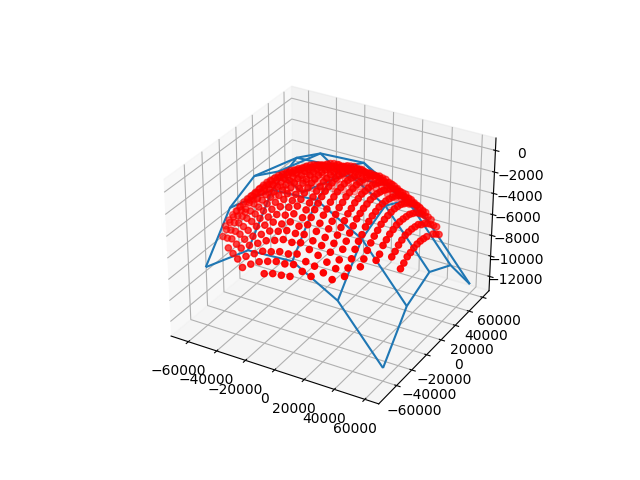

In [12]:
import numpy as np
import matplotlib.pyplot as plt

@np.vectorize
def find_offset(x, y):

    centre = np.array([0, 0],dtype='float64')

    x_diff = np.array(x-centre[0], dtype='float64')
    y_diff = np.array(y-centre[1], dtype='float64')
    # r = np.sqrt(x_diff**2+y_diff**2, dtype='float64')
    z_diff = int(-1.434 * 10**-6 * x_diff**2 -3.602 * 10**-2 * x_diff -1.3895 * 10**-6 * y_diff**2 -0.2643 * 10**-2 * y_diff)
    return (z_diff)

x = np.linspace(-60000,60000, 5)
y = np.linspace(-60000,60000, 5)

X, Y = np.meshgrid(x,y)

z = find_offset(X, Y)

%matplotlib widget

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_wireframe(X, Y, z)
ax.scatter(to_plot_x, to_plot_y, to_plot_z, color = 'r')
plt.show()